# Задание №2

#### Описание ситуации:
Существует процесс обработки нарушений, формируемых камерами фото и видео фиксации. Камеры детектируют различные нарушения и формируют материалы нарушения, при этом распознают номерной знак (ГРЗ, государственный регистрационный знак) транспортного средства (ТС). После этого все нарушения анализируются компетентным сотрудником (оператором) и принимается решение: оформить нарушение, или забраковать с некоторой причиной. В случае если ГРЗ распознан камерой неверно, то по нарушению получены не корректные данные о собственнике и сотрудник может изменить ГРЗ и получить корректные данные, что требует дополнительных сил и времени от сотрудника.
В существующий процесс внедрен дополнительный механизм обработки изображения ГРЗ другим математическим алгоритмом до того как материал будет передан оператору, ожидается, что использование ГРЗ от нового алгоритма позволит уменьшить кол-во замен ГРЗ оператором.

#### Цель:
Минимизировать трудозатраты сотрудников по замене ГРЗ

#### Для этого необходимо:
1. Сформировать правило (определить условия) по которому нужно изменять ГРЗ с распознанного камерой, на распознанный новым математическим аппаратом.
2. Указать и обосновать критерии корректности замены ГРЗ.
3. Оценить качество работы правила, указать экономию операций по замене ГРЗ.

Python version - 3.9.13

In [1]:
#!pip install ydata-profiling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import re
import seaborn as sns
from ydata_profiling import ProfileReport

plt.style.use('ggplot')
pd.options.display.float_format ='{:,.10f}'.format
%matplotlib inline

### Подготовка данных

In [ ]:
#pd.set_option('max_colwidth', None) #default 50

In [2]:
df = pd.read_csv('test_data_regno.csv', sep=';', index_col='id')
df

,camera_id,time_check,regno_recognize,regno_ai,regno,result_code,symbols,symbol_scores,length_scores
id,,,,,,,,,
1,844,00:00:00,У991КВ799,У991КВ799,У991КВ799,0,"[""У"", ""9"", ""9"", ""1"", ""К"", ""В"", ""7"", ""9"", ""9""]","[0.9999366998672485, 0.9999223947525024, 0.999...","[0.000000034831597162110484, 0.000000034835451..."
2,2516,00:00:00,О019УК177,О019УК177,О019УК177,0,"[""О"", ""0"", ""1"", ""9"", ""У"", ""К"", ""1"", ""7"", ""7""]","[0.9998993873596191, 0.999862790107727, 0.9999...","[0.0000000068477667980459955, 0.00000000683332..."
3,2476,00:00:00,Е175АК150,Е175АК150,Е175АК150,0,"[""Е"", ""1"", ""7"", ""5"", ""А"", ""К"", ""1"", ""5"", ""0""]","[0.9997256398200989, 0.9999269247055054, 0.999...","[0.000000002039653557162069, 0.000000002043387..."
4,1251,00:00:01,Т359ОН799,Т359ОН799,Т359ОН799,0,"[""Т"", ""3"", ""5"", ""9"", ""О"", ""Н"", ""7"", ""9"", ""9""]","[0.9998781681060791, 0.9998764991760254, 0.999...","[0.00000002880540606042814, 0.0000000289985120..."
5,2516,00:00:01,В521СУ750,В521СУ750,В521СУ750,0,"[""В"", ""5"", ""2"", ""1"", ""С"", ""У"", ""7"", ""5"", ""0""]","[0.999920129776001, 0.9999333620071411, 0.9999...","[0.000000009300508807541519, 0.000000009201486..."
...,...,...,...,...,...,...,...,...,...
194210,5497,23:59:58,В035Т_197,В035ТС197,В035Т_197,1,"[""В"", ""0"", ""3"", ""5"", ""Т"", ""С"", ""1"", ""9"", ""7""]","[0.9998652935028076, 0.9999170303344727, 0.999...","[0.000000012212018951629489, 0.000000012157821..."
194211,6320,23:59:58,А974КА67,А974КА67,А974КА67,2,"[""А"", ""9"", ""7"", ""4"", ""К"", ""А"", ""6"", ""7""]","[0.9999264478683472, 0.9999524354934692, 0.999...","[0.0000000026609143777278632, 0.00000000267139..."
194212,2659,23:59:58,Х037НН777,Х037НН777,Х037НН777,0,"[""Х"", ""0"", ""3"", ""7"", ""Н"", ""Н"", ""7"", ""7"", ""7""]","[0.9999473094940186, 0.9999399185180664, 0.999...","[0.0000000758142704171405, 0.00000007637027721..."


Описание полей данных:
- id - идентификатор нарушения
- camera_id - идентификатор камеры сформировавшей нарушение
- time_check - время фиксации нарушения
- regno_recognize - ГРЗ распознанный камерой
- regno_ai - ГРЗ распознанный новым математическим алгоритмом
- regno - ГРЗ в итоге процесса обработки нарушения (по умолчанию он равен regno_recognize, если не изменялся оператором)
- result_code - финальный код результата обработки нарушения (подробная расшифровка ниже)
- symbols - ГРЗ распознанный новым математическим алгоритмом, по символьно
- symbol_scores - скор уверенности нового мат. алгоритма по каждому символу из symbols (значения от 0 до 1)
- length_scores - скор уверенности длинны ГРЗ нового мат. алгоритма начиная с длинны 0, и до длинны 10 символов (значения от 0 до 1)

Расшифровка result_code:
- 0 - оформлено
- 1 - забраковано по причине "плохо виден ГРЗ"
- 2 - забраковано по причине "ошибка в адресе собственника"
- 3 - забраковано по причине "ошибка в иных данных собственника"
- 4 - забраковано по причине "плохое качество изображения"
- 5 - забраковано по причине "иное"

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194214 entries, 1 to 194214
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   camera_id        194214 non-null  int64 
 1   time_check       194214 non-null  object
 2   regno_recognize  194214 non-null  object
 3   regno_ai         194214 non-null  object
 4   regno            194214 non-null  object
 5   result_code      194214 non-null  int64 
 6   symbols          194214 non-null  object
 7   symbol_scores    194214 non-null  object
 8   length_scores    194214 non-null  object
dtypes: int64(2), object(7)
memory usage: 14.8+ MB


In [4]:
print('Пропуски в данных отсутствуют')
print(f'Кол-во явных дубликатов: {df.duplicated().sum()}')

Пропуски в данных отсутствуют
Кол-во явных дубликатов: 3


In [5]:
df[df.duplicated()]

,camera_id,time_check,regno_recognize,regno_ai,regno,result_code,symbols,symbol_scores,length_scores
id,,,,,,,,,
119332,1374,15:23:20,Н353Н_16,3К70000,Н353Н_16,1,"[""3"", ""К"", ""7"", ""0"", ""0"", ""0"", ""0""]","[0.7137595415115356, 0.4964924156665802, 0.504...","[0.0000012534120514828828, 0.00000124833854897..."
167810,1374,20:47:13,А316АК77,А813РС77,А316АК77,4,"[""А"", ""8"", ""1"", ""3"", ""Р"", ""С"", ""7"", ""7""]","[0.13046413660049438, 0.32664334774017334, 0.5...","[0.015294507145881653, 0.01527694147080183, 0...."
174828,6335,21:47:16,Т276МА,Т276МА33,Т276МА,5,"[""Т"", ""2"", ""7"", ""6"", ""М"", ""А"", ""3"", ""3""]","[0.9997952580451965, 0.9999676942825317, 0.999...","[0.0000000008263651984918852, 0.00000000082343..."


Дубликаты отсутсвтуют

In [ ]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_widgets()
#profile.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
columns = ['camera_id', 'result_code']

#Уменьшение выделяемой памяти
for col in columns:
    c_min = df[col].min()
    c_max = df[col].max()
    if c_min > np.iinfo("i1").min and c_max < np.iinfo("i1").max:
        df[col] = df[col].astype(np.int8)
    elif c_min > np.iinfo("i2").min and c_max < np.iinfo("i2").max:
        df[col] = df[col].astype(np.int16)
    elif c_min > np.iinfo("i4").min and c_max < np.iinfo("i4").max:
        df[col] = df[col].astype(np.int32)
    elif c_min > np.iinfo("i8").min and c_max < np.iinfo("i8").max:
        df[col] = df[col].astype(np.int64)
    print(f'Column \'{col}\' - {df[col].dtype}')

Column 'camera_id' - int16
Column 'result_code' - int8


In [7]:
#Преобразование столбца DataFrame строкового типа, наполненный числами (пример: 'symbol_scores')
def convert_to_float(df):
    return [pd.to_numeric(re.findall('[\w.]+', str(df[i+1]))) for i in range(df.shape[0])]

In [8]:
df['symbol_scores'] = convert_to_float(df['symbol_scores'])
df['length_scores'] = convert_to_float(df['length_scores'])

In [9]:
#агрегирующая метрика symbol_scores
df['symbol_mean'] = [df['symbol_scores'][row+1].mean() for row in range(df.shape[0])]

#наибольший значение length_scores
df['length_max'] = [df['length_scores'][row+1].max() for row in range(df.shape[0])]

#кол-во символов, предсказанных мат. алгоритмов
df['num_chars'] = [df['length_scores'][row+1].argmax() for row in range(df.shape[0])]

In [10]:
#Для удоства создадим ещё один DataFrame, состоящий из забракованных записей,а также отбросим стобцы, неинформативные/дублирующиеся столбцы
df_defect = df[df['result_code'] != 0]
print(f'Размер выборки, забракованных рез-тов = {df_defect.shape}')

Размер выборки, забракованных рез-тов = (58925, 12)


### Выявление зависимостей

In [11]:
df.describe()

,camera_id,result_code,symbol_mean,length_max,num_chars
count,"194,214.0000000000","194,214.0000000000","194,214.0000000000","194,214.0000000000","194,214.0000000000"
mean,"4,506.6569814740",1.0942259569,0.9807637026,0.9939619671,8.6794566818
std,"2,506.2464582719",1.7999020879,0.0775143069,0.0419035799,0.5623658323
min,700.0000000000,0.0000000000,0.1805802444,0.3559468985,7.0000000000
25%,"1,452.0000000000",0.0000000000,0.9997849481,0.9999541044,8.0000000000
50%,"5,769.0000000000",0.0000000000,0.9998885041,0.9999831915,9.0000000000
75%,"6,386.0000000000",3.0000000000,0.9999222358,0.9999942780,9.0000000000
max,"8,901.0000000000",5.0000000000,0.9999863572,1.0000000000,9.0000000000


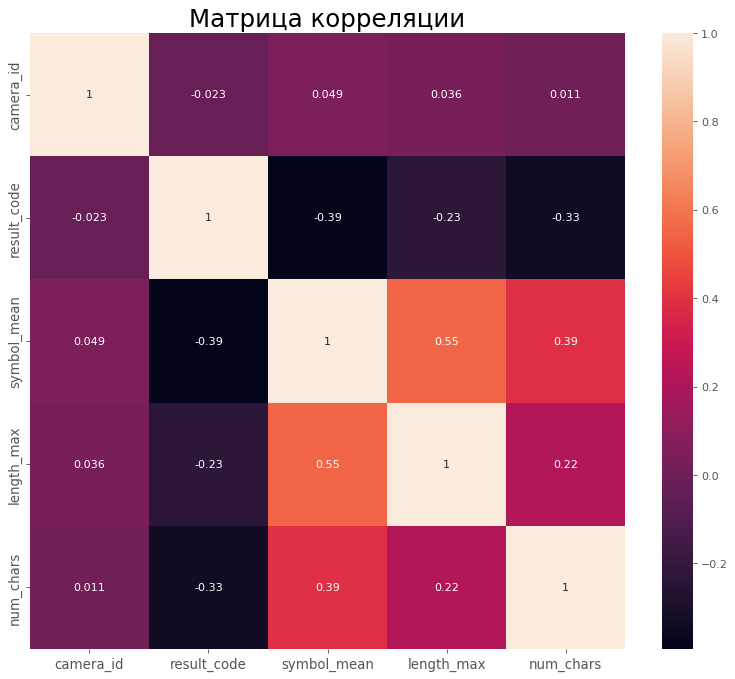

In [12]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), annot=True)
plt.title('Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

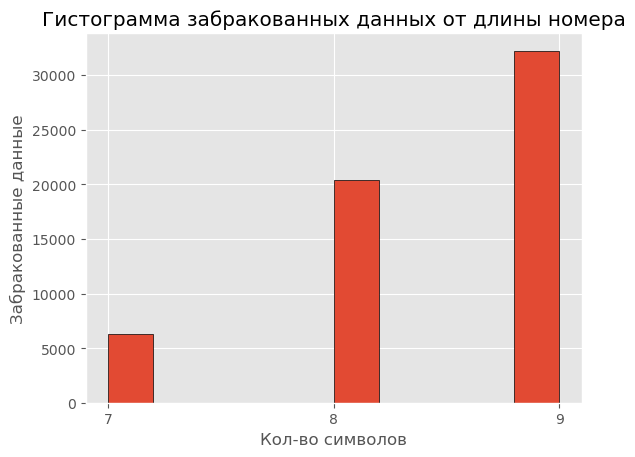

In [13]:
plt.hist(df_defect['num_chars'], edgecolor='black')
plt.title('Гистограмма забракованных данных от длины номера')
plt.xticks(range(7, 10))
plt.xlabel('Кол-во символов')
plt.ylabel('Забракованные данные')
plt.show()

In [14]:
df_defect.groupby(by='camera_id') \
         .agg({'result_code' : 'count'}) \
         .sort_values(by='result_code', ascending=False).head(10)

,result_code
camera_id,
6090,653
6445,536
895,399
2663,389
740,366
7126,351
1372,333
6479,320
5709,315


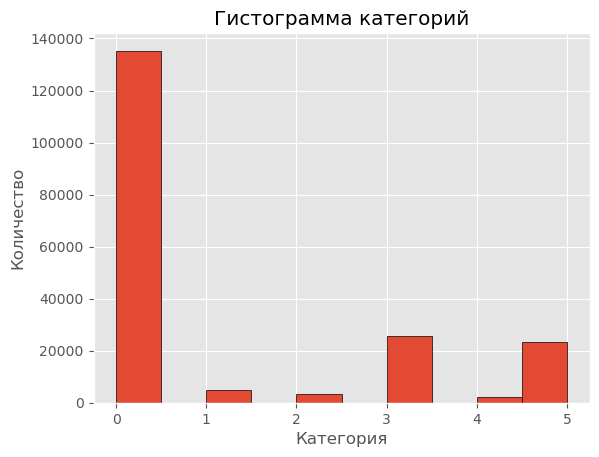

In [15]:
plt.hist(df['result_code'], edgecolor='black')
plt.title('Гистограмма категорий')
plt.xticks(range(0, 6))
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.show()

Данные, когда камера неверно распознала ГРЗ, но мат. алгоритм распознал верно ГРЗ, т.к. данные вручную заменены операторов (следует из условия выше)

In [16]:
df.query('regno_ai == regno & regno_recognize != regno').sort_values(by='symbol_mean').head(10)

,camera_id,time_check,regno_recognize,regno_ai,regno,result_code,symbols,symbol_scores,length_scores,symbol_mean,length_max,num_chars
id,,,,,,,,,,,,
53344,3743,08:50:22,338_АХ50,3386АХ50,3386АХ50,0,"[""3"", ""3"", ""8"", ""6"", ""А"", ""Х"", ""5"", ""0""]","[0.398146778345108, 0.9147242903709412, 0.6900...","[3.5811219277e-05, 3.58430988853e-05, 3.589813...",0.6707424745,0.9944650531,8
24256,5769,05:00:50,АС86067,АС46067,АС46067,5,"[""А"", ""С"", ""4"", ""6"", ""0"", ""6"", ""7""]","[0.9569143652915956, 0.8338883519172668, 0.671...","[0.0001566699065733, 0.0001570766762597, 0.000...",0.7750075885,0.5399861932,7
23694,2516,04:51:23,ВН57374,ВН573874,ВН573874,0,"[""В"", ""Н"", ""5"", ""7"", ""3"", ""8"", ""7"", ""4""]","[0.999561607837677, 0.9839684963226318, 0.9996...","[1.92950165e-06, 1.9345261534e-06, 1.923800482...",0.8206912279,0.9749858975,8
25821,2516,05:22:49,ЕМ74877,ЕМ748477,ЕМ748477,0,"[""Е"", ""М"", ""7"", ""4"", ""8"", ""4"", ""7"", ""7""]","[0.9976869821548462, 0.896393895149231, 0.9997...","[8.5515994214e-06, 8.6440477389e-06, 8.5849787...",0.8452600911,0.9927359819,8
121808,7118,15:36:46,ВС96077,ВС960677,ВС960677,0,"[""В"", ""С"", ""9"", ""6"", ""0"", ""6"", ""7"", ""7""]","[0.9997925162315368, 0.9416382908821106, 0.999...","[1.50690284499e-05, 1.50691275848e-05, 1.49574...",0.8634435423,0.9806086421,8
92497,786,12:52:58,ВК783А53,ВК783А50,ВК783А50,5,"[""В"", ""К"", ""7"", ""8"", ""3"", ""А"", ""5"", ""0""]","[0.9912697076797484, 0.521683931350708, 0.9783...","[6.803463747e-07, 6.763813189e-07, 6.759369739...",0.8822133914,0.9998347759,8
191798,4100,23:43:30,Р_18477,РР18477,РР18477,0,"[""Р"", ""Р"", ""1"", ""8"", ""4"", ""7"", ""7""]","[0.9999417066574096, 0.4116600751876831, 0.998...","[3.676758524e-07, 3.659006608e-07, 3.651501572...",0.8933020319,0.9994706511,7
20788,5500,03:47:35,ЕН18150,ЕН181550,ЕН181550,0,"[""Е"", ""Н"", ""1"", ""8"", ""1"", ""5"", ""5"", ""0""]","[0.9987755417823792, 0.9262840151786804, 0.999...","[1.5779354498e-06, 1.5796233583e-06, 1.5765847...",0.9074829891,0.9932394028,8
193085,2516,23:52:22,АУ86447,АУ864647,АУ864647,0,"[""А"", ""У"", ""8"", ""6"", ""4"", ""6"", ""4"", ""7""]","[0.9985643029212952, 0.8112595677375793, 0.999...","[1.4149127309e-06, 1.4187569377e-06, 1.4105017...",0.9094406888,0.9949053526,8


In [17]:
df.query('regno_ai == regno & regno_recognize != regno') \
         .groupby(by='result_code') \
         .agg({'result_code' : 'count', 'symbol_mean': 'mean', 'length_max' : 'mean'}) \
         .sort_values(by='symbol_mean', ascending=False)

,result_code,symbol_mean,length_max
result_code,,,
3,441,0.9997749021,0.9997466551
0,8007,0.9994032485,0.9998520980
2,207,0.9991923423,0.9997891136
4,80,0.9983640340,0.9998836763
5,888,0.9982470581,0.9988587917
1,55,0.9951128686,0.9956648967


In [18]:
df.query('regno_ai != regno & regno_recognize != regno').sort_values(by='symbol_mean').head(10)

,camera_id,time_check,regno_recognize,regno_ai,regno,result_code,symbols,symbol_scores,length_scores,symbol_mean,length_max,num_chars
id,,,,,,,,,,,,
3804,1164,00:25:51,_АМ101,3АМ4721,АМ41013,5,"[""3"", ""А"", ""М"", ""4"", ""7"", ""2"", ""1""]","[0.2079990804195404, 0.2567141950130462, 0.283...","[0.0008029452292248, 0.0008025168790481, 0.000...",0.3070461558,0.9431275129,7
171152,2312,21:18:31,_SQZ505,1КМ0028,I35QZ505,5,"[""1"", ""К"", ""М"", ""0"", ""0"", ""2"", ""8""]","[0.3269557058811188, 0.3640177547931671, 0.232...","[0.0001398631866322, 0.0001396102452417, 0.000...",0.3243227707,0.9277760983,7
72072,724,10:51:38,_SZU500,352D000,35ZU500,5,"[""3"", ""5"", ""2"", ""D"", ""0"", ""0"", ""0""]","[0.2706872820854187, 0.3872999250888824, 0.307...","[0.000340886763297, 0.000341180129908, 0.00034...",0.3441652528,0.7208749056,7
36053,2515,06:52:46,_7349IК,А733550,7349IК3,5,"[""А"", ""7"", ""3"", ""3"", ""5"", ""5"", ""0""]","[0.2075786739587783, 0.9848067164421082, 0.441...","[0.0004174929927103, 0.0004186983278486, 0.000...",0.3574906907,0.6145784259,8
183937,8412,22:52:03,АО601935,36830М3,36М935,5,"[""3"", ""6"", ""8"", ""3"", ""0"", ""М"", ""3""]","[0.3538849651813507, 0.2333397269248962, 0.291...","[0.0001485736283939, 0.0001484230742789, 0.000...",0.3594748697,0.8893898129,7
103283,711,13:54:37,_АFР384,3Е6D823,36GР384,5,"[""3"", ""Е"", ""6"", ""D"", ""8"", ""2"", ""3""]","[0.3086372017860412, 0.2502632737159729, 0.613...","[0.0003444812609814, 0.0003442660090513, 0.000...",0.3665669922,0.6427131295,7
126059,5137,15:59:44,ОВ50301,6038332,18SU370,5,"[""6"", ""0"", ""3"", ""8"", ""3"", ""3"", ""2""]","[0.2138359248638153, 0.3130367398262024, 0.568...","[0.0003380245470907, 0.0003389607009012, 0.000...",0.3689070429,0.8167309761,8
38581,754,07:10:01,Р181ТК1_1,С911К801,8181КВ1,5,"[""С"", ""9"", ""1"", ""1"", ""К"", ""8"", ""0"", ""1""]","[0.4975248277187347, 0.2485051304101944, 0.269...","[6.23389860265e-05, 6.23208543402e-05, 6.23385...",0.3815755062,0.9946041703,8
109416,8431,14:29:59,АО007913,1ЕМD890,36GR903,5,"[""1"", ""Е"", ""М"", ""D"", ""8"", ""9"", ""0""]","[0.26100555062294, 0.3723011910915375, 0.34785...","[1.6607128827e-06, 1.6599876744e-06, 1.6567722...",0.3843132428,0.9992213249,7


In [19]:
df.query('regno_ai != regno & regno_recognize != regno') \
         .groupby(by='result_code') \
         .agg({'result_code' : 'count', 'symbol_mean': 'mean', 'length_max' : 'mean'}) \
         .sort_values(by='symbol_mean', ascending=False)

,result_code,symbol_mean,length_max
result_code,,,
4,17,0.9901274799,0.9999123146
1,9,0.9675810134,0.8870527479
3,37,0.9414856229,0.9742332939
2,24,0.9274002934,0.9961602514
0,216,0.8957529894,0.9793156016
5,1130,0.6855701588,0.8707104646


Итого: 

* 1433 случая, когда ошиблась и камера и алгоритм
* 9678 случаей, когда ошиблась камера, но не ошибся алгоритм

Всего: `11111` случаев, когда сотрудник (оператор) изменил ГРЗ на корректные данные<br/>
Всего: `58925` забракованных данных

In [20]:
df.query('regno_ai == regno & regno_recognize != regno & symbol_mean >= 0.95 & length_max >=0.95').sort_values(by='symbol_mean').head(10)

,camera_id,time_check,regno_recognize,regno_ai,regno,result_code,symbols,symbol_scores,length_scores,symbol_mean,length_max,num_chars
id,,,,,,,,,,,,
55453,7129,09:03:48,В189АА161,В189АА761,В189АА761,0,"[""В"", ""1"", ""8"", ""9"", ""А"", ""А"", ""7"", ""6"", ""1""]","[0.9999645948410034, 0.9997856020927428, 0.999...","[6.4907013e-08, 6.51334701e-08, 6.50865246e-08...",0.9569187827,0.9998569489,9
19509,7298,03:20:17,Т214АК161,Т214АК761,Т214АК761,0,"[""Т"", ""2"", ""1"", ""4"", ""А"", ""К"", ""7"", ""6"", ""1""]","[0.9999163150787354, 0.9999606609344482, 0.999...","[2.375408882e-07, 2.363254623e-07, 2.372968026...",0.9581419428,0.9996155500,9
174625,7298,21:45:40,С791ОХ69,С798ОК69,С798ОК69,0,"[""С"", ""7"", ""9"", ""8"", ""О"", ""К"", ""6"", ""9""]","[0.9999547004699708, 0.9999061822891236, 0.999...","[1.33880178e-07, 1.356077348e-07, 1.349232547e...",0.9583398774,0.9998846054,8
157794,780,19:18:57,С489АВ161,С489АВ761,С489АВ761,0,"[""С"", ""4"", ""8"", ""9"", ""А"", ""В"", ""7"", ""6"", ""1""]","[0.9999098777770996, 0.9998724460601808, 0.999...","[5.1533e-08, 5.15025426e-08, 5.13736253e-08, 5...",0.9591720038,0.9998575449,9
122171,6519,15:38:47,О761ЕВ79,О761ЕВ799,О761ЕВ799,1,"[""О"", ""7"", ""6"", ""1"", ""Е"", ""В"", ""7"", ""9"", ""9""]","[0.6357667446136475, 0.999969482421875, 0.9999...","[1.70047584e-08, 1.70733009e-08, 1.69858296e-0...",0.9593925940,0.9998644590,9
23009,869,04:38:57,У233897,У233899,У233899,5,"[""У"", ""2"", ""3"", ""3"", ""8"", ""9"", ""9""]","[0.9998202919960022, 0.7604984045028687, 0.986...","[5.4211297e-09, 5.4444968e-09, 5.4068074e-09, ...",0.9598630241,0.9999516010,7
24748,782,05:08:28,А_24499,А124499,А124499,5,"[""А"", ""1"", ""2"", ""4"", ""4"", ""9"", ""9""]","[0.9999936819076538, 0.7680996656417847, 0.964...","[1.10515125e-08, 1.10911919e-08, 1.10829443e-0...",0.9598665833,0.9998524189,7
185298,5499,23:01:09,О201ТС76,О201ТС77,О201ТС77,5,"[""О"", ""2"", ""0"", ""1"", ""Т"", ""С"", ""7"", ""7""]","[0.9986220598220824, 0.9999055862426758, 0.998...","[2.165070327e-07, 2.148893685e-07, 2.147449436...",0.9603795707,0.9995425940,8
5267,7140,00:36:02,О779АЕ76,О779АЕ761,О779АЕ761,5,"[""О"", ""7"", ""7"", ""9"", ""А"", ""Е"", ""7"", ""6"", ""1""]","[0.9997987151145936, 0.9999710321426392, 0.999...","[2.542493859e-07, 2.522176032e-07, 2.533084e-0...",0.9604839616,0.9940530658,9


In [21]:
df.query('regno_recognize != regno_ai & symbol_mean >= 0.995 & length_max >=0.995').sort_values(by='symbol_mean').head(10)

,camera_id,time_check,regno_recognize,regno_ai,regno,result_code,symbols,symbol_scores,length_scores,symbol_mean,length_max,num_chars
id,,,,,,,,,,,,
166761,6289,20:37:10,А435ЕЕ17,А435СЕ177,А435ЕЕ17,4,"[""А"", ""4"", ""3"", ""5"", ""С"", ""Е"", ""1"", ""7"", ""7""]","[0.9999678134918212, 0.9999635219573976, 0.999...","[8.30265562e-08, 8.32647586e-08, 8.2912777e-08...",0.9950204028,0.9999661446,9
126954,1372,16:04:47,Р586НС150,Р886НС150,Р886НС150,0,"[""Р"", ""8"", ""8"", ""6"", ""Н"", ""С"", ""1"", ""5"", ""0""]","[0.999775230884552, 0.9563689827919006, 0.9998...","[6.5623053e-09, 6.5362475e-09, 6.5727654e-09, ...",0.9950223896,0.9999989271,9
5950,8414,00:41:07,В985РА198,В985РА190,В985РА198,5,"[""В"", ""9"", ""8"", ""5"", ""Р"", ""А"", ""1"", ""9"", ""0""]","[0.999969720840454, 0.9999303817749025, 0.9999...","[2.6706719e-09, 2.6719864e-09, 2.6759339e-09, ...",0.9950228135,0.9999985695,9
99881,6437,13:36:18,А683ТО77,Х683ТО77,А683ТО77,1,"[""Х"", ""6"", ""8"", ""3"", ""Т"", ""О"", ""7"", ""7""]","[0.9608879089355468, 0.999857783317566, 0.9998...","[1.005652237e-07, 1.004837386e-07, 1.000324445...",0.9950304851,0.9998701811,8
112466,6445,14:46:28,У010АО197,У010АО777,У010АО197,1,"[""У"", ""0"", ""1"", ""0"", ""А"", ""О"", ""7"", ""7"", ""7""]","[0.999825656414032, 0.9999138116836548, 0.9999...","[1.91950579e-08, 1.91698497e-08, 1.92332816e-0...",0.9950421916,0.9999874830,9
191122,895,23:38:59,А647НТ79,А647НТ799,А647НТ79,1,"[""А"", ""6"", ""4"", ""7"", ""Н"", ""Т"", ""7"", ""9"", ""9""]","[0.999982476234436, 0.9998955726623536, 0.9998...","[6.10766903e-08, 6.11910806e-08, 6.10644619e-0...",0.9950435162,0.9990810156,9
193781,785,23:56:48,Т469УХ777,В469УХ777,Т469УХ777,5,"[""В"", ""4"", ""6"", ""9"", ""У"", ""Х"", ""7"", ""7"", ""7""]","[0.9560481905937196, 0.9998635053634644, 0.999...","[3.12676142e-08, 3.1197203e-08, 3.10881453e-08...",0.9950446486,0.9999719858,9
165922,6499,20:28:19,К257ВС777,К257ВВ777,К257ВС777,1,"[""К"", ""2"", ""5"", ""7"", ""В"", ""В"", ""7"", ""7"", ""7""]","[0.9997304081916808, 0.9999281167984008, 0.999...","[1.733955201e-07, 1.745614213e-07, 1.723201989...",0.9950639804,0.9998943806,9
23374,1840,04:45:49,Х892ВР79,Х892ВР799,Х892ВР79,4,"[""Х"", ""8"", ""9"", ""2"", ""В"", ""Р"", ""7"", ""9"", ""9""]","[0.9997988343238832, 0.9999568462371826, 0.999...","[1.481822664e-07, 1.48376273e-07, 1.483650891e...",0.9950717489,0.9972611666,9


## Вывод

#### Правило для замены ГРЗ:

1. Если ГРЗ, распознанный камерой, содержит символы, которые не могут быть номерными знаками (например, буквы не из алфавита страны регистрации ТС), то производится замена ГРЗ на распознанный новым математическим аппаратом.

2. Если ГРЗ, распознанный камерой, содержит символы, которые могут быть номерными знаками, но имеет неправильную структуру (например, неверное количество символов или неправильное расположение символов), то производится замена ГРЗ на распознанный новым математическим аппаратом.

3. Если ГРЗ, распознанный камерой, имеет верную структуру и символы, которые могут быть номерными знаками, но содержит ошибки в распознавании отдельных символов (например, неправильно определены некоторые цифры или буквы), то производится замена только этих неправильно распознанных символов на соответствующие символы из распознанного новым математическим аппаратом номерного знака.

4. Среднее оценок вхождения символов из предсказанных значений мат. алгоритмом должен составлять не менее `значения`; оценка длины символов не менее `значения`. При таких показателях правило нацелено на точность (доля объектов, предсказанных правильно), при понижении одного или обоих показателей будет увеличиваться полнота (часть объектов, имеющий удовлетворяющий ответ по прогнозу мат. алгоритма), но понижаться точность, в результате чего результат      

#### Критерии корректности замены ГРЗ:

1. Корректность символов: Замененный ГРЗ должен содержать только символы, которые могут быть номерными знаками в соответствии с правилами страны регистрации ТС.

2. Корректность структуры: Замененный ГРЗ должен иметь верное количество символов и правильное расположение символов в соответствии с правилами страны регистрации ТС.

3. Корректность замены отдельных символов: Если производится замена только неправильно распознанных символов, то замененные символы должны соответствовать действительным символам номерного знака.

4. Корректность оценки: Если производится замена, при соблюдение одного или нескольких правил, то `symbol_ mean >= 0.995` И максимальное значение `lenght_score >= 0.995`.

#### Оценка качества работы правила и экономии операций по замене ГРЗ:

1. Сравнить количество случаев, когда ГРЗ был заменен оператором до внедрения нового алгоритма обработки изображения ГРЗ и после его внедрения. Если количество замен уменьшилось при соблюдении описанных выше условий, то правило работает эффективно.

- ##### Результат: при внедрении правил 11513 (9645 истино положительные,следует из услвовия) записей удовлетворяет им из 194214, оператор совершит на `6%` меньше операций либо использует их для распознования других данных. При таких показателях оценки результат ориентирован на точность (доля объектов, предсказанных правильно), при понижении одного или обоих показателей будет увеличиваться полнота (часть объектов, имеющий удовлетворяющий ответ по прогнозу мат. алгоритма), но понижаться точность, в результате чего возвожны один или более неверных символов, один или более отсутсвующих символ, в результате оператор совершит больше операций по обработке, но они стоимость этих операций операций будет меньше, т.к. алгоритм будет выдавать более приближенный результат чем камера.       

